In [1]:
using DSP, FFTW

In [5]:
sweep(t,t₀,t₁,f₀,f₁) = (t₀ < t < t₁) ? sin(2π*(t-t₀)*(f₀ + 0.5*(f₁ - f₀)/(t₁ - t₀)*(t - t₀))) : 0.0

sweep (generic function with 1 method)

In [ ]:
Δt = 0.004  # sample period (s)
n = 500
t = 0:Δt:(n-1)*Δt
nl = [0.05, 0.0]  # 5% noise level and noise-free
ϵ = 0.1;   # white noise for deconvolution

In [ ]:
s1 = [sweep.(t,0.5,1.5,8.,64.) .+ nl*(2*rand(n) .- 1) for nl in nl]   # add random noise
s2 = [sweep.(t,0.,0.5,8.,36.)  .+ nl*(2*rand(n) .- 1) for nl in nl]   # add random noise

xc = [xcorr(s1,s2)[n:end] for (s1,s2) in zip(s1,s2)]   # xcorr's length = 2*n - 1, cut to length n

In [12]:
f = LinRange(-0.5/Δt, 0.5/Δt, n+1)[n÷2+1:end]
S1 = fft.(s1);   S1a = [fftshift(abs.(S1))[n÷2:end] for S1 in S1]
S2 = fft.(s2);   S2a = [fftshift(abs.(S2))[n÷2:end] for S2 in S2]
Xc = fft.(xc);   Xca = [fftshift(abs.(Xc))[n÷2:end] for Xc in Xc]

2-element Vector{Vector{Float64}}:
 [26.060434394154576, 17.489775850563625, 26.060434394154527, 23.741374497584953, 26.902154515776143, 20.994397167053556, 28.832520834836092, 37.9106110110207, 36.65336562940983, 25.878484211422094  …  0.16771554338729366, 1.265175195787605, 0.380817825610473, 0.31302026475069367, 0.5667896727056573, 0.31164046282696634, 0.44745021220058506, 0.46665376313650286, 0.27359860561997756, 0.6747444979983225]
 [25.513503386086338, 15.930422685759913, 25.5135033860863, 25.254299877487142, 26.990383096985177, 17.683487418159217, 28.361211294720988, 29.930204605958583, 33.67441683877149, 24.093404230549247  …  0.09152296695136282, 0.1428204786450526, 0.138738354730231, 0.14226473416291155, 0.0907175329942432, 0.14181411673961936, 0.13784840632255382, 0.14153853727323126, 0.09031831499035634, 0.14138913380321763]

In [15]:
# deconvolve Xc for S2
S2_decon =  [@. conj(Xc)*S1 / (S1*conj(S1) + ϵ^2) for (S1,Xc) in zip(S1,Xc)];
S2a_decon = [fftshift(abs.(S2_decon))[n÷2:end] for S2_decon in S2_decon];
s2_decon = [real(ifft(S2_decon)) for S2_decon in S2_decon];

In [ ]:
# deconvolve Xc for S1
S1_decon = [@. Xc*S2 / (S2*conj(S2) + ϵ^2) for (S2,Xc) in zip(S2,Xc)]
S1a_decon = [fftshift(abs.(S1_decon))[n÷2:end]  for S1_decon in S1_decon]
s1_decon = [real(ifft(S1_decon)) for S1_decon in S1_decon]

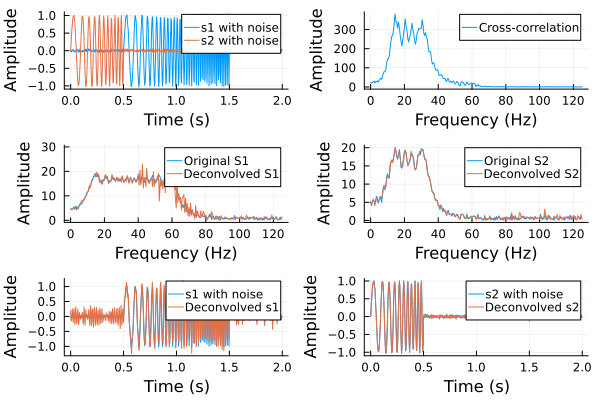

In [7]:
using Plots

# Plot signals s1 and s2
plot1 = plot(t, s1[1], label="s1 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, s2[1], label="s2 with noise")

# Plot the cross-correlation xc
plot2 = plot(f, Xca[1], label="Cross-correlation", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)

# Plot the deconvolution results for S1
plot3 = plot(f, S1a[1], label="Original S1", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)
plot!(f, S1a_decon[1], label="Deconvolved S1")

# Plot the deconvolution results for S2
plot4 = plot(f, S2a[1], label="Original S2", xlabel="Frequency (Hz)", ylabel="Amplitude", legend=:topright)
plot!(f, S2a_decon[1], label="Deconvolved S2")

# Plot the deconvolution results in the time domain
plot5 = plot(t, s1[1], label="s1 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, s1_decon[1], label="Deconvolved s1")

plot6 = plot(t, s2[1], label="s2 with noise", xlabel="Time (s)", ylabel="Amplitude", legend=:topright)
plot!(t, s2_decon[1], label="Deconvolved s2")

# Arrange subplots in a grid
plot(plot1, plot2, plot3, plot4, plot5, plot6, layout=(3, 2))

# References
[Inverse of Cross Correlation?](https://discourse.julialang.org/t/inverse-of-cross-correlation/64357)

In [ ]:
Δt = 0.004  # sample period (s)
n = 500
t = 0:Δt:(n-1)*Δt
nl = [0.05, 0.0]  # 5% noise level and noise-free
ϵ = 0.1;   # white noise for deconvolution
s1 = [sweep.(t,0.5,1.5,8.,64.) .+ nl*(2*rand(n) .- 1) for nl in nl]   # add random noise
s2 = [sweep.(t,0.,0.5,8.,36.)  .+ nl*(2*rand(n) .- 1) for nl in nl]   # add random noise

xc = [xcorr(s1,s2)[n:end] for (s1,s2) in zip(s1,s2)]   # xcorr's length = 2*n - 1, cut to length n
f = LinRange(-0.5/Δt, 0.5/Δt, n+1)[n÷2+1:end]
𝑆₁ = fft.(s1);   𝑆₁a = [fftshift(abs.(𝑆₁))[n÷2:end] for 𝑆₁ in 𝑆₁]
𝑆₂ = fft.(s2);   𝑆₂a = [fftshift(abs.(𝑆₂))[n÷2:end] for 𝑆₂ in 𝑆₂]
𝑋ᵪ = fft.(xc);   𝑋ᵪa = [fftshift(abs.(𝑋ᵪ))[n÷2:end] for 𝑋ᵪ in 𝑋ᵪ]

# deconvolve 𝑋ᵪ for 𝑆₂
𝑆₂_decon =  [@. conj(𝑋ᵪ)*𝑆₁ / (𝑆₁*conj(𝑆₁) + ϵ^2) for (𝑆₁,𝑋ᵪ) in zip(𝑆₁,𝑋ᵪ)]
𝑆₂a_decon = [fftshift(abs.(𝑆₂_decon))[n÷2:end] for 𝑆₂_decon in 𝑆₂_decon]
𝑆₂_decon = [real(ifft(𝑆₂_decon)) for 𝑆₂_decon in 𝑆₂_decon]

# deconvolve 𝑋ᵪ for 𝑆₁
𝑆₁_decon = [@. 𝑋ᵪ*𝑆₂ / (S2*conj(𝑆₂) + ϵ^2) for (𝑆₂,𝑋ᵪ) in zip(𝑆₂,𝑋ᵪ)]
𝑆₁a_decon = [fftshift(abs.(𝑆₁_decon))[n÷2:end]  for 𝑆₁_decon in 𝑆₁_decon]
𝑆₁_decon = [real(ifft(𝑆₁_decon)) for 𝑆₁_decon in 𝑆₁_decon]